# Assigment 2: Deep Learning

## Generate Dataset

This is the same code from Assignment 1

In [274]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)


## Visualize Dataset
This is the same code from Assignment 1

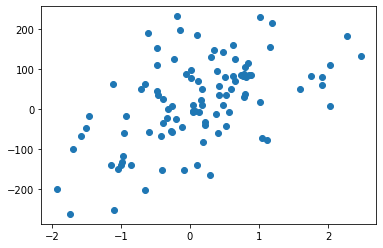

In [275]:
import matplotlib.pyplot as plt
# plotting 5 features using scatter plot each graph is plotted between 1 feature and its outcom value
plt.scatter(X[:,0],y)

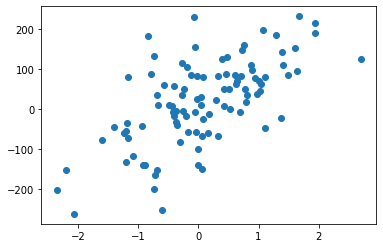

In [276]:
plt.scatter(X[:,1],y)


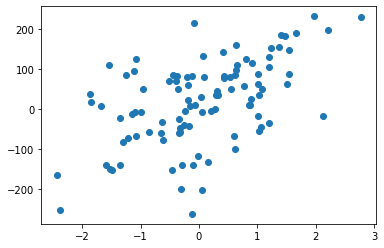

In [277]:
plt.scatter(X[:,2],y)


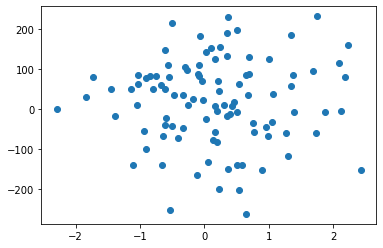

In [278]:
plt.scatter(X[:,3],y)


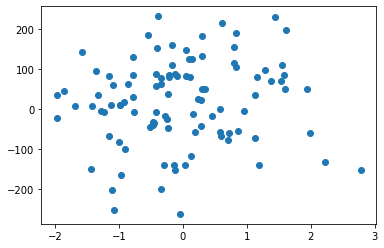

In [279]:
plt.scatter(X[:,4],y)


## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [280]:
# importing required libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import Model

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

#  adding dense layers using Sequential model along with regularization technique.
# Regularizers allow you to apply penalties on layer parameters or layer activity during optimization.
# These penalties are summed into the loss function that the network optimizes.
      # kernel_regularizer: Regularizer to apply a penalty on the layer's kernel
      # A regularizer that applies both L1 and L2 regularization penalties.
      # The L1 regularization penalty is computed as: loss = l1 * reduce_sum(abs(x))
      # The L2 regularization penalty is computed as loss = l2 * reduce_sum(square(x))

model = Sequential()
model.add(Dense(5, activation='relu', input_shape=(5,),  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)))
model.add(Dense(5, activation='relu',  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)))
model.add(Dense(1,  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)))

# summarizing the model structure.
model.summary()


Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_186 (Dense)           (None, 5)                 30        
                                                                 
 dense_187 (Dense)           (None, 5)                 30        
                                                                 
 dense_188 (Dense)           (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [281]:
#creating an optimizer with new learning rate as a changed parameter.
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=opt,loss='mse',metrics=['mse'])

#Keras provides the capability to register callbacks when training a deep learning model.
#One of the default callbacks that is registered when training all deep learning models is the History callback. 
#It records training metrics for each epoch.
#This includes the loss, accuracy (for classification problems), mse( for linear regression problems).

history = model.fit(X_train, y_train,epochs=95,validation_data = (X_val, y_val))
# By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.

loss , mse = model. evaluate(X_test , y_test, verbose = 1)
print('MSE : %.3f' % mse)

Epoch 1/95
2/2 [==============================] - 1s 197ms/step - loss: 11441.7930 - mse: 11439.2744 - val_loss: 11816.3721 - val_mse: 11813.8457
Epoch 2/95
2/2 [==============================] - 0s 29ms/step - loss: 11424.2852 - mse: 11421.7520 - val_loss: 11810.0938 - val_mse: 11807.5410
Epoch 3/95
2/2 [==============================] - 0s 38ms/step - loss: 11411.1611 - mse: 11408.6035 - val_loss: 11799.9619 - val_mse: 11797.3711
Epoch 4/95
2/2 [==============================] - 0s 30ms/step - loss: 11394.0469 - mse: 11391.4482 - val_loss: 11783.2168 - val_mse: 11780.5732
Epoch 5/95
2/2 [==============================] - 0s 31ms/step - loss: 11359.8086 - mse: 11357.1484 - val_loss: 11765.4600 - val_mse: 11762.7354
Epoch 6/95
2/2 [==============================] - 0s 30ms/step - loss: 11306.8848 - mse: 11304.1426 - val_loss: 11696.1836 - val_mse: 11693.3311
Epoch 7/95
2/2 [==============================] - 0s 32ms/step - loss: 11176.6504 - mse: 11173.7539 - val_loss: 11507.5693 - val_

In [282]:
y_pred = model.predict(X_test)

## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


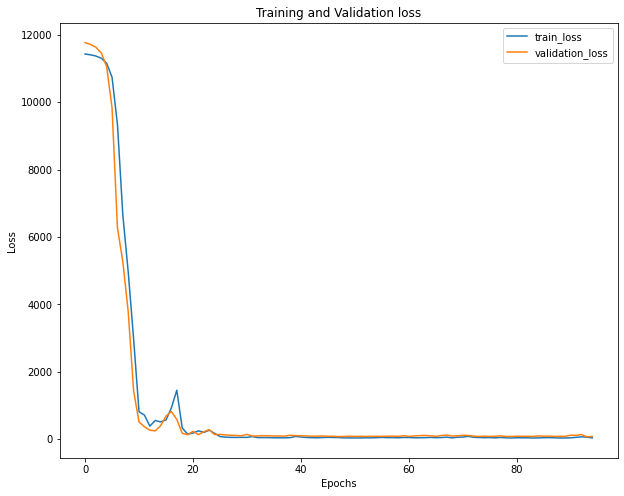

In [110]:
# Your code here
print(history.history.keys())
# summarize history for accuracy
plt.figure(figsize=(10, 8))                   # making the graph scale big 
plt.plot(history.history['loss'])             # plotting loss key of history
plt.plot(history.history['val_loss'])         # ploting validation loss 
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train_loss', 'validation_loss'], loc='upper right')


plt.show()

## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [112]:
# # Insert the function for R2 Score

import numpy as np
from sklearn.metrics import r2_score
accu = r2_score(y_test, y_pred) # Pass appropriate parts of dataset
print("Accuracy:", accu)

Accuracy: 0.9951718388196231


## Your own custom model
Build a custom model of your own choice.<br>
Describe it in detail in Markdown/Latex in the cell below.<br>
Visualise the loss, as before.

#### Creating model comprising:

**Input Layer : 1
Dense Layer : 3
output Layer : 1**


In [268]:
from tensorflow.keras import layers
Model = Sequential(
[
  layers.Dense(5, activation='relu', input_shape=(5,),  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)),
    
  layers.Dense(4, activation='relu',  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)),
  layers.Dense(4, activation='relu',  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)),
  layers.Dense(4, activation='relu',  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)),
  layers.Dense(8, activation='relu',  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)),


  layers.Dense(1,  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01))
])
# summarizing the model structure.
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 5)                 30        
                                                                 
 dense_43 (Dense)            (None, 5)                 30        
                                                                 
 dense_44 (Dense)            (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


##**Fitting the custom model with optimised learning rate**
learning rate = 0.1 

Total_number_of_iterations = 128

In [269]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1) # used adam optimizer
Model.compile(optimizer=opt,loss='mse',metrics=['mse'])
history = Model.fit(X_train, y_train,epochs=128,validation_data = (X_val, y_val))


Epoch 1/128
2/2 [==============================] - 1s 252ms/step - loss: 11440.1445 - mse: 11435.6973 - val_loss: 11818.1016 - val_mse: 11814.0781
Epoch 2/128
2/2 [==============================] - 0s 31ms/step - loss: 11419.7266 - mse: 11415.7480 - val_loss: 11747.2998 - val_mse: 11743.3545
Epoch 3/128
2/2 [==============================] - 0s 29ms/step - loss: 11332.7295 - mse: 11328.7559 - val_loss: 11475.5586 - val_mse: 11471.4268
Epoch 4/128
2/2 [==============================] - 0s 36ms/step - loss: 10947.9980 - mse: 10943.7422 - val_loss: 10651.6260 - val_mse: 10646.9375
Epoch 5/128
2/2 [==============================] - 0s 43ms/step - loss: 9694.0957 - mse: 9689.2266 - val_loss: 8716.7373 - val_mse: 8711.3369
Epoch 6/128
2/2 [==============================] - 0s 35ms/step - loss: 7026.2129 - mse: 7020.6191 - val_loss: 6806.9053 - val_mse: 6800.6992
Epoch 7/128
2/2 [==============================] - 0s 31ms/step - loss: 6865.0029 - mse: 6858.6416 - val_loss: 5512.6006 - val_mse:

In [270]:
y_predict = model.predict(X_test)

# Plot Loss

Using matplotlib on visualizing how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


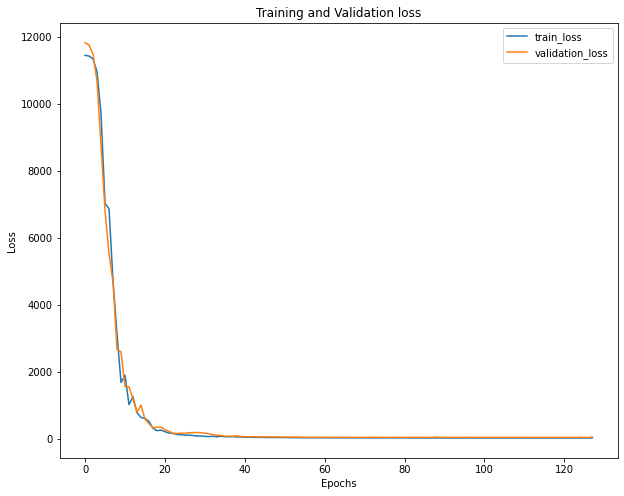

In [271]:

print(history.history.keys())
# summarize history for accuracy
plt.figure(figsize=(10, 8))                   # making the graph scale big 
plt.plot(history.history['loss'])             # plotting loss key of history
plt.plot(history.history['val_loss'])         # ploting validation loss 
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train_loss', 'validation_loss'], loc='upper right')


plt.show()

##Evaluating MSE and measuring accuracy using r2_score

In [273]:
loss , mse = model. evaluate(X_test , y_test, verbose = 1)
print('MSE : %.3f' % mse)

import numpy as np
from sklearn.metrics import r2_score
accu = r2_score(y_test, y_pred) # Pass appropriate parts of dataset
print("Accuracy:", accu)

1/1 [==============================] - 0s 23ms/step - loss: 54.8271 - mse: 47.2117
MSE : 47.212
Accuracy: 0.9951718388196231
